In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

# our library
from sat_metropolis import smt,mcmc,utils

In [2]:
south_head = pd.read_csv("south_head.csv")
south_head

,,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85-89 years,90 years and over
0,Male,3,6,6,12,9,3,9,9,6,6,15,6,3,6,3,3,0,0,0
1,Female,6,0,3,6,3,6,3,9,3,6,9,6,9,3,3,3,0,0,0
2,Total,15,3,12,15,15,12,9,18,9,12,21,12,12,12,6,0,0,0,0


In [3]:
#number of varibles
num_vars = 19*2 # where does this number come from?

x = [Int(f'x{i}') for i in range(num_vars)]

numpy_data = south_head.to_numpy()[:,1:]
s = Solver()

for i in range(28):
    s.add(x[i]>=0)
    
for i in range(19):
    s.add(x[i] <= numpy_data[0,i]+2)
    if(numpy_data[0,i]>0):
        s.add(numpy_data[0,i]-2 <= x[i])
            
    s.add(x[i+19] <= numpy_data[1,i]+2)
    if(numpy_data[1,i]>0):
        s.add(numpy_data[1,i]-2 <= x[i+19])
        
    s.add(x[i+19] + x[i] <= numpy_data[2,i]+2)
    if(numpy_data[2,i]>0):
        s.add(numpy_data[2,i]-2 <= x[i+19]+x[i])

In [4]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='megasampler', z3_problem=s)

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 131
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 38
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
---------SOLVING STATISTICS--------
do_epoch time: 1.26913
epoch time: 1.2717
grow_seed time: 0.00105177
initial_solving time: 0.00226059
output time: 0.00836262
start_epoch time: 0.00525569
total time: 1.61351
Epochs: 2
MAX-SMT calls: 3
SMT calls: 0
Assignments considered (with repetitions): 10000
Models (with repetitions): 10000
Unique models (# samples in file): 10000
-----------------------------------


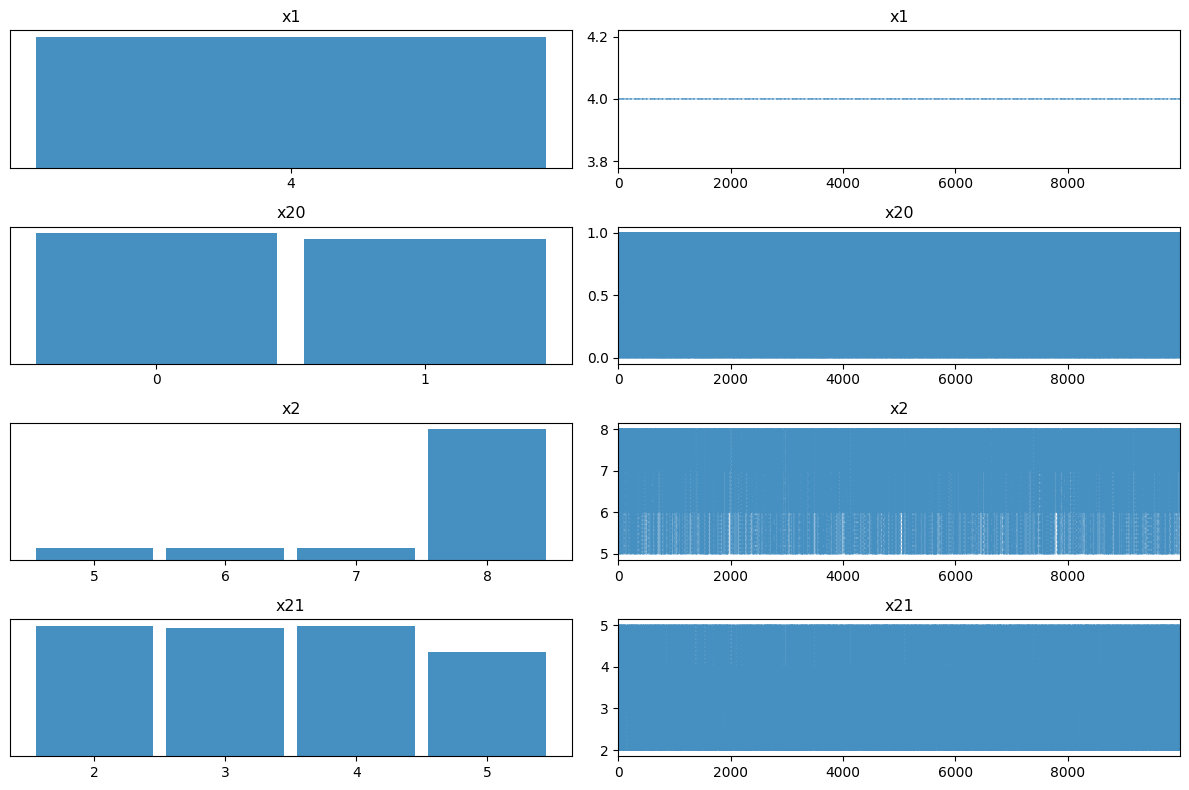

In [5]:
# Plot the posterior
az.plot_trace(trace, var_names=['x1', 'x20', 'x2', 'x21']);
plt.savefig('megasampler_trace_plot.png', dpi=150);

In [6]:
# Diagnostics
az.summary(trace)

/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,NaN,40000.0,40000.0,NaN
x1,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,NaN,40000.0,40000.0,NaN
x2,7.576000e+00,9.000000e-01,5.000000e+00,8.000000e+00,5.000000e-03,5.000000e-03,40269.0,39436.0,1.0
x3,1.049200e+01,5.000000e-01,1.000000e+01,1.100000e+01,3.000000e-03,0.000000e+00,39973.0,39973.0,1.0
x4,9.434000e+00,1.090000e+00,8.000000e+00,1.100000e+01,6.000000e-03,2.000000e-03,38807.0,39899.0,1.0
x5,4.500000e+00,5.000000e-01,4.000000e+00,5.000000e+00,3.000000e-03,0.000000e+00,39992.0,39992.0,1.0
x6,7.501000e+00,5.000000e-01,7.000000e+00,8.000000e+00,3.000000e-03,0.000000e+00,38775.0,38775.0,1.0
x7,9.209000e+00,9.150000e-01,8.000000e+00,1.100000e+01,5.000000e-03,2.000000e-03,39689.0,40000.0,1.0
x8,7.004000e+00,8.140000e-01,6.000000e+00,8.000000e+00,4.000000e-03,1.000000e-03,40388.0,40000.0,1.0
x9,6.991000e+00,8.190000e-01,6.000000e+00,8.000000e+00,4.000000e-03,1.000000e-03,39572.0,39698.0,1.0


In [7]:
utils.save_trace(trace, f'nz_db_SMT_{num_vars}.nc')